In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import numpy as np

In [136]:
dread = pd.read_csv("redfin_2020-02-03-15-18-32.csv")

In [137]:

dread = dread[['STATUS', 'PROPERTY TYPE', 'BEDS', 'BATHS', 'PRICE', 'CITY', 'SQUARE FEET','ZIP OR POSTAL CODE','LOCATION','ADDRESS']]

In [138]:
dread= dread.dropna(how="all")
dread['CITY'],y = pd.factorize(dread['CITY'])
dread['CITY'] += 1
dread = dread.fillna(dread.mean())

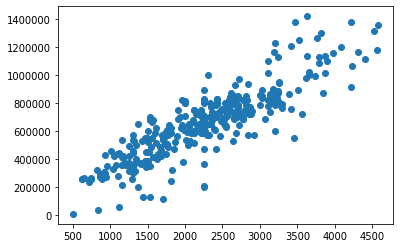

In [139]:
plt.scatter(dread['SQUARE FEET'],dread['PRICE'])



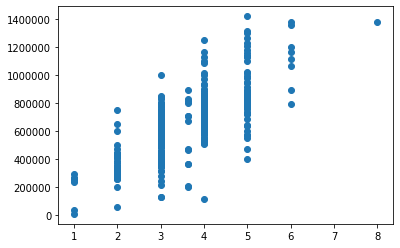

In [140]:
plt.scatter(dread['BEDS'],dread['PRICE'])


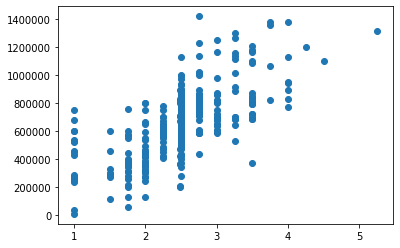

In [141]:

plt.scatter(dread['BATHS'],dread['PRICE'])


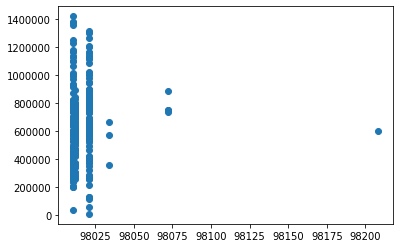

In [142]:

plt.scatter(dread['ZIP OR POSTAL CODE'],dread['PRICE'])


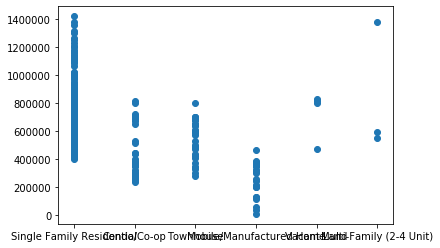

In [143]:


plt.scatter(dread['PROPERTY TYPE'],dread['PRICE'])



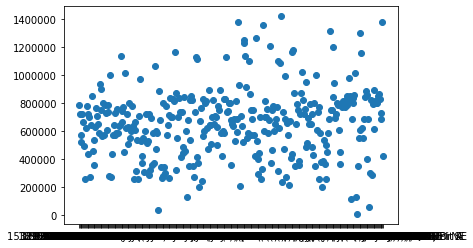

In [144]:

plt.scatter(dread['ADDRESS'],dread['PRICE'])

In [145]:
#1 to 60% of total rows
training_data = dread[:math.floor (len(dread) * 0.6)]

#after the above 60% till the 80% 
validating_data = dread[math.floor (len(dread) * 0.6) : math.floor (len(dread) * 0.8)]

#after the above 80% till the 100%
testing_data = dread[math.floor (len(dread) * 0.8) :]

training_data_Y = training_data['PRICE'].values
training_data_X = training_data[['CITY','BEDS','BATHS','SQUARE FEET']].values

validating_data_Y = validating_data['PRICE'].values
validating_data_X = validating_data[['CITY','BEDS','BATHS','SQUARE FEET']].values

testing_data_Y = testing_data['PRICE'].values
testing_data_X = testing_data[['CITY','BEDS','BATHS','SQUARE FEET']].values

In [146]:
xT = np.transpose(training_data_X)
xTx = np.matmul ( xT, training_data_X )
inverse_xTx = np.linalg.inv ( xTx )
xTy = np.matmul ( xT, training_data_Y )
theta_function =  np.matmul (inverse_xTx, xTy)

print (theta_function)

[30767.02509874 33783.92395931 18857.95751586   201.34625195]


In [147]:
#Validation of Data
error_function = ( np.matmul( validating_data_X, theta_function ) - validating_data_Y ) ** 2

mean_square_error = np.sum(error_function)
root_mean_square_error = np.sqrt(mean_square_error) / np.size(error_function)
print ("Root Mean Square Error :",root_mean_square_error)

Root Mean Square Error : 15001.928808142367


In [148]:
predicted_Y = np.matmul ( testing_data_X ,theta_function )

Text(0, 0.5, 'Price')

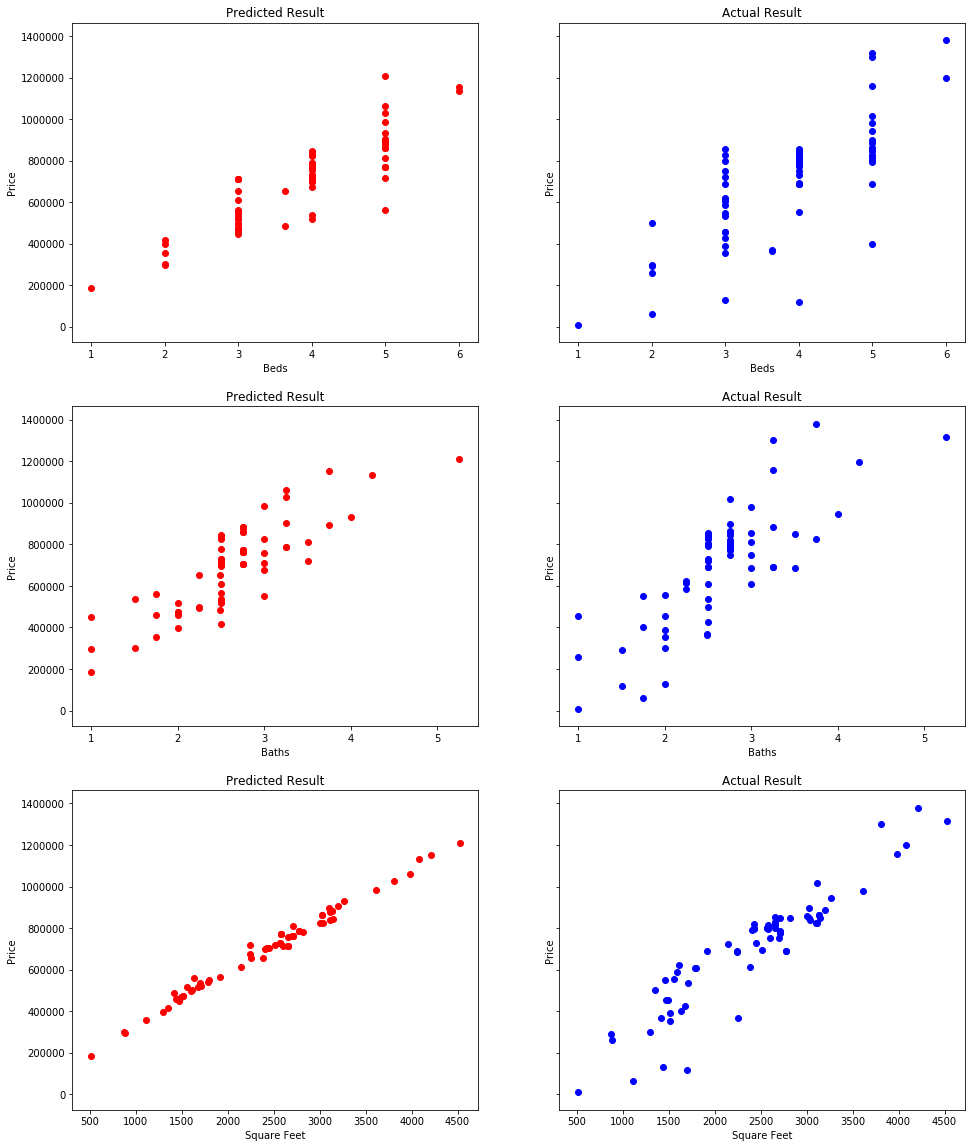

In [149]:
fig, arr = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(20)

#Beds
arr[0][0].scatter (testing_data_X[:,1], predicted_Y, c='r' )
arr[0][0].set_title('Predicted Result')
arr[0][0].set_xlabel('Beds')
arr[0][0].set_ylabel('Price')

arr[0][1].scatter (testing_data_X[:,1], testing_data_Y, c='b' )
arr[0][1].set_title('Actual Result')
arr[0][1].set_xlabel('Beds')
arr[0][1].set_ylabel('Price')

#Baths
arr[1][0].scatter (testing_data_X[:,2], predicted_Y, c='r' )
arr[1][0].set_title('Predicted Result')
arr[1][0].set_xlabel('Baths')
arr[1][0].set_ylabel('Price')

arr[1][1].scatter (testing_data_X[:,2], testing_data_Y, c='b' )
arr[1][1].set_title('Actual Result')
arr[1][1].set_xlabel('Baths')
arr[1][1].set_ylabel('Price')

#SquareFeet
arr[2][0].scatter (testing_data_X[:,3], predicted_Y, c='r' )
arr[2][0].set_title('Predicted Result')
arr[2][0].set_xlabel('Square Feet')
arr[2][0].set_ylabel('Price')

arr[2][1].scatter (testing_data_X[:,3], testing_data_Y, c='b' )
arr[2][1].set_title('Actual Result')
arr[2][1].set_xlabel('Square Feet')
arr[2][1].set_ylabel('Price')

Text(0.5, 1.0, 'Actual Result')

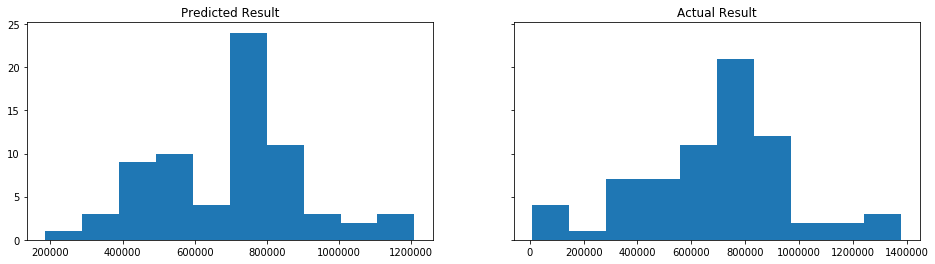

In [150]:
fig, arr = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(4)

arr[0].hist(predicted_Y)
arr[0].set_title('Predicted Result')

arr[1].hist(testing_data_Y)
arr[1].set_title('Actual Result')